Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   


# Python aplicado à análise de estruturas
---
## <center> Aula 4:  Os módulos Pandas e Matplotlib</center>

[1. O módulo Pandas](#section_1)

[1.1 Importação de dados](#section_11)

[1.2 Manipulção de dados](#section_12)

[1.3 Integração Pandas e Numpy](#section_13)

[1.4 Criação e exportação de um DataFrame](#section_14)

[2. O módulo Matplotlib](#section_2)

[2.1. Integração Matplotlib e Pandas](#section_21)

[2.1. O que é possível fazer com o matplotlib?](#section_22)


---

_Eng.Msc Eduarto Pagnussat Titello_

_Eng.Daniel Barbosa M. Matos_

# O módulo Pandas<a name="section_1"></a>

O módulo Pandas é fundamental para a realização de uma análise de dados. Com ele, é possível a importação de arquivos de dados (como planilhas eletrônicas e arquivos *csv*) e a criação de **Series** e **DataFrames**. As Series são sequências de dados unidimensionais que possuem índice (uma espécie de dicionário) e os Dataframes são estruturas de dados bidimensionais, como planilhas. Nesta aula, iremos focar nos objetos de DataFrame.


In [1]:
import pandas as pd

## Importação de dados<a name="section_11"></a>

Para realizar a importação de arquivos, utiliza-se a função ```read```. Com ela, é possível a criação de um objeto DataFrame a partir de algum formato de arquivo escolhido pelo usuário. Abaixo, realizaremos a importação de uma planilha de excel.

In [2]:
data = pd.read_excel('Resources/Arquivo_teste.xlsx', index_col = 0)

Os dois argumentos indispensáveis para a importação do arquivo são: o caminho para o arquivo e a coluna que deve ser usada como índice. Outros argumentos podem ser utilizados, como por exemplo `sheet_name`, que informa a aba a ser importada. 

Para a visualização dos dados importados, basta escrever o nome da váriavel que armazena o DataFrame em uma célula de código.

In [3]:
data

,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Coluna 7,Coluna 8,Coluna 9,Coluna 10,...,Coluna 26,Coluna 27,Coluna 28,Coluna 29,Coluna 30,Coluna 31,Coluna 32,Coluna 33,Coluna 34,Coluna 35
Linha 1,3,8,13,18,23,28,33,38,43,48,...,128,133,138,143,148,153,158,163,168,173
Linha 2,22,27,32,37,42,47,52,57,62,67,...,147,152,157,162,167,172,177,182,187,192
Linha 3,23,28,33,38,43,48,53,58,63,68,...,148,153,158,163,168,173,178,183,188,193
Linha 4,24,29,34,39,44,49,54,59,64,69,...,149,154,159,164,169,174,179,184,189,194
Linha 5,25,30,35,40,45,50,55,60,65,70,...,150,155,160,165,170,175,180,185,190,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Linha 84,104,109,114,119,124,129,134,139,144,149,...,229,234,239,244,249,254,259,264,269,274
Linha 85,105,110,115,120,125,130,135,140,145,150,...,230,235,240,245,250,255,260,265,270,275
Linha 86,106,111,116,121,126,131,136,141,146,151,...,231,236,241,246,251,256,261,266,271,276
Linha 87,107,112,117,122,127,132,137,142,147,152,...,232,237,242,247,252,257,262,267,272,277


## Manipulação de dados<a name="section_12"></a>
O objeto DataFrame possui uma vasta variedade de métodos que podem ser utilizada para a manipulção dos dados. A seguir, veremos alguns deles. 

O método ```.loc()```permite ao usuário selecionar uma determinada parte do seu DataFrame.

In [4]:
cols = ['Coluna 1','Coluna 17','Coluna 32']
lins = ['Linha 20','Linha 42','Linha 43']
reduc = data.loc[lins,cols]
reduc

,Coluna 1,Coluna 17,Coluna 32
Linha 20,40,120,195
Linha 42,62,142,217
Linha 43,63,143,218


Você pode, também, usar o método ```sort_values()``` para ordenar os valores conforme a sua vontade.

In [5]:
reduc.sort_values(by='Coluna 1')

,Coluna 1,Coluna 17,Coluna 32
Linha 20,40,120,195
Linha 42,62,142,217
Linha 43,63,143,218


Esta operação não altera o nosso DataFrame original.

Utilizando os métodos ```.mean()```e ```.std()``` você também consegue estrair a média e o desvio padrão das colunas do seu DataFrame.

In [6]:
reduc.mean()


Coluna 1      55.0
Coluna 17    135.0
Coluna 32    210.0
dtype: float64

In [7]:
reduc.std()

Coluna 1     13.0
Coluna 17    13.0
Coluna 32    13.0
dtype: float64

Para uma análise completa do DataFrame, também é possível utilizar o método ```.describe()```.

In [8]:
reduc.describe()

,Coluna 1,Coluna 17,Coluna 32
count,3.0,3.0,3.0
mean,55.0,135.0,210.0
std,13.0,13.0,13.0
min,40.0,120.0,195.0
25%,51.0,131.0,206.0
50%,62.0,142.0,217.0
75%,62.5,142.5,217.5
max,63.0,143.0,218.0


## Integração Pandas e Numpy<a name="section_13"></a>

É possível transformar dados do seu DataFrame em um `ndarray`, tornando possível a utilização de todos os seus métodos e atributos.

In [9]:
matriz = data.values
print(matriz)
print(type(matriz))


[[  3   8  13 ... 163 168 173]
 [ 22  27  32 ... 182 187 192]
 [ 23  28  33 ... 183 188 193]
 ...
 [106 111 116 ... 266 271 276]
 [107 112 117 ... 267 272 277]
 [108 113 118 ... 268 273 278]]
<class 'numpy.ndarray'>


## Criação e exportação de um DataFrame<a name="section_14"></a>

Neste tópico será mostrado como se cria um DataFrame e como deve-se fazer a sua exportação.

In [10]:
import numpy as np
colunas = np.linspace(0,100,101)
linhas = np.linspace(0,60,61)
x,y = np.meshgrid(linhas,colunas) # Combina os valores em forma de grade
z = x**2 -y
dados = pd.DataFrame(data = z.T, index = linhas, columns = colunas)
dados

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
0.0,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.0,-9.0,...,-91.0,-92.0,-93.0,-94.0,-95.0,-96.0,-97.0,-98.0,-99.0,-100.0
1.0,1.0,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.0,...,-90.0,-91.0,-92.0,-93.0,-94.0,-95.0,-96.0,-97.0,-98.0,-99.0
2.0,4.0,3.0,2.0,1.0,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,...,-87.0,-88.0,-89.0,-90.0,-91.0,-92.0,-93.0,-94.0,-95.0,-96.0
3.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,...,-82.0,-83.0,-84.0,-85.0,-86.0,-87.0,-88.0,-89.0,-90.0,-91.0
4.0,16.0,15.0,14.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,...,-75.0,-76.0,-77.0,-78.0,-79.0,-80.0,-81.0,-82.0,-83.0,-84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56.0,3136.0,3135.0,3134.0,3133.0,3132.0,3131.0,3130.0,3129.0,3128.0,3127.0,...,3045.0,3044.0,3043.0,3042.0,3041.0,3040.0,3039.0,3038.0,3037.0,3036.0
57.0,3249.0,3248.0,3247.0,3246.0,3245.0,3244.0,3243.0,3242.0,3241.0,3240.0,...,3158.0,3157.0,3156.0,3155.0,3154.0,3153.0,3152.0,3151.0,3150.0,3149.0
58.0,3364.0,3363.0,3362.0,3361.0,3360.0,3359.0,3358.0,3357.0,3356.0,3355.0,...,3273.0,3272.0,3271.0,3270.0,3269.0,3268.0,3267.0,3266.0,3265.0,3264.0
59.0,3481.0,3480.0,3479.0,3478.0,3477.0,3476.0,3475.0,3474.0,3473.0,3472.0,...,3390.0,3389.0,3388.0,3387.0,3386.0,3385.0,3384.0,3383.0,3382.0,3381.0


Para realizar a exportação, utilizamos o método ```to_excel()```.


In [11]:
dados.to_excel('Resources/planilha_python.xlsx')

# O módulo matplotlib.pyplot<a name="section_2"></a>

O matplotlib.pyplot é um módulo que permite a plotagem de gráficos no estilo Matlab. Este módulo é compatível com objetos do módulo Pandas e do módulo Numpy. Abaixo será ilustrada uma "receita de bolo" para a plotagem de gráficos.

In [12]:
import matplotlib.pyplot as plt

In [21]:
#-- Calculando os eixos X e Y.--#

t = np.linspace(0,50,204)                    # Criando o eixo do tempo[s]
A = 2                                        # Amplitude do movimento[m]
w = 0.5                                      # Frequência de oscilação[rad/s]
phi = -np.pi/2                               # Ângulo de fase[rad]

X = A*np.cos(phi+w*t)                        # Equação da elongação (MHS)

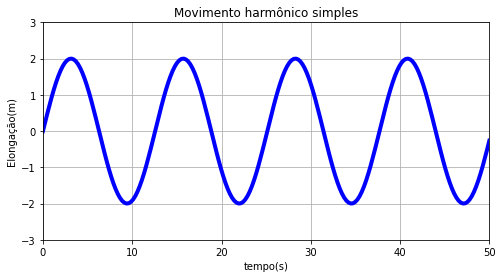

In [22]:
#-- Preparando a plotagem --#

plt.figure(1,figsize=(8,4))                 # Criando a figura e definindo seu número e tamanho em X e Y
plt.plot(t,X,'b',linewidth = 4)                           # Plotando os valores de X e Y e definindo a cor do gráfico
plt.title('Movimento harmônico simples')    # título do gráfico
plt.xlabel('tempo(s)')                      # Nome do eixo X
plt.ylabel('Elongação(m)')                  # Nome do eixo y
plt.xlim(0,50) ; plt.ylim(-3,3)             # Definindo os limites de cada eixo
plt.grid(True)                              # Plotando a grade

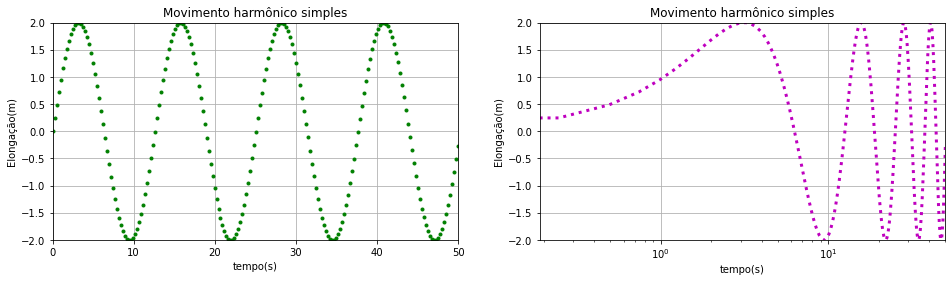

In [24]:
plt.figure(2,figsize=(16,4))                 # Criando a figura e definindo seu número e tamanho em X e Y

#plt.subplot(No de linhas, No de colunas, No da plotagem )
plt.subplot(1,2,1)
plt.plot(t,X,'g.')                          # Plotando os valores de X e Y e definindo a cor do gráfico
plt.title('Movimento harmônico simples')    # título do gráfico
plt.xlabel('tempo(s)')                      # Nome do eixo X
plt.ylabel('Elongação(m)')                  # Nome do eixo y
plt.xlim(0,50) ; plt.ylim(-2,2)             # Definindo os limites de cada eixo
plt.grid(True)                              # Plotando a grade


plt.subplot(1,2,2)
plt.plot(t,X,'m:',linewidth = 3)            # Plotando os valores de X e Y e definindo a cor do gráfico
plt.title('Movimento harmônico simples')    # Título do gráfico
plt.xscale('log')                           # Mudando a escala do gráfico
plt.xlabel('tempo(s)')                      # Nome do eixo X
plt.ylabel('Elongação(m)')                  # Nome do eixo y
plt.xlim(0,50) ; plt.ylim(-2,2)             # Definindo os limites de cada eixo
plt.grid(True)                              # Plotando a grade

Você também pode plotar gráficos do tipo scatter, para a plotagem de uma nuvem de pontos.

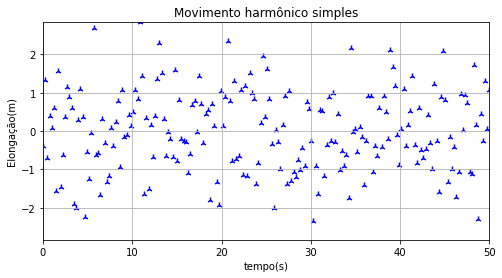

In [42]:
#-- Preparando a plotagem --#

plt.figure(1,figsize=(8,4))                     # Criando a figura e definindo seu número e tamanho em X e Y
rand = np.random.randn(len(t))                  # Gera valores randomicos
plt.scatter(t,rand,s=1,color ='b',marker ='2')  # Plotando os valores de X e Y e definindo a cor do gráfico, s indica o tamanho
plt.title('Movimento harmônico simples')        # título do gráfico
plt.xlabel('tempo(s)')                          # Nome do eixo X
plt.ylabel('Elongação(m)')                      # Nome do eixo y
plt.xlim(0,50) ; plt.ylim(-max(rand),max(rand)) # Definindo os limites de cada eixo
plt.grid(True)                                  # Plotando a grade

Para visualiar mais opções de estilos de plotagem, basta clicar [aqui](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html)

## Integração matplotlib e Pandas<a name="section_21"></a>

Os objetos do módulo pandas possuem um método de plotagem. Abaixo, veremos algumas possibilidades.

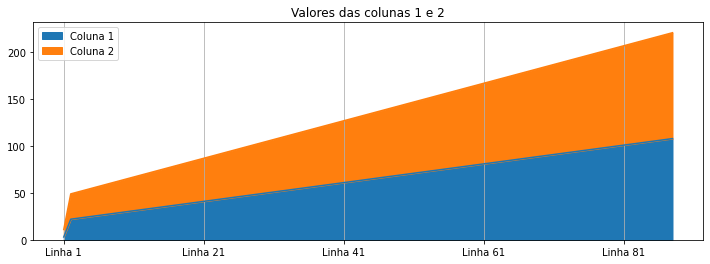

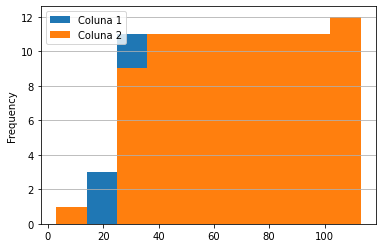

In [85]:
data[['Coluna 1','Coluna 2']].plot.area(figsize=(12,4)); plt.grid(axis ='x')
plt.title('Valores das colunas 1 e 2')
data[['Coluna 1','Coluna 2']].plot.hist(); plt.grid(axis ='y')
plt.savefig('Resources/salvando_figura.png') #comando para salvar a figura no diretório


## O que é possível fazer com o matplotlib?<a name="section_22"></a>

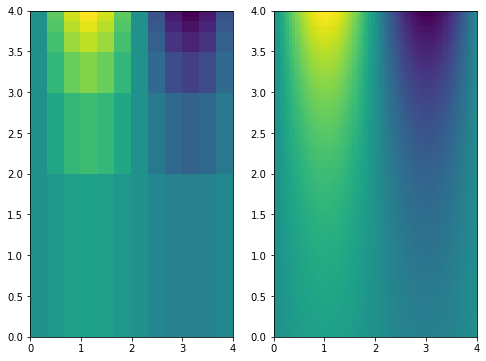

In [18]:
from scipy.interpolate import interp2d
x = np.linspace(0, 4, 13)
y = np.array([0, 2, 3, 3.5, 3.75, 3.875, 3.9375, 4])
X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi*X/2) * np.exp(Y/2)

x2 = np.linspace(0, 4, 65)
y2 = np.linspace(0, 4, 65)
f = interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)

plt.figure(6,figsize=(8,6))
plt.subplot(1,2,1)
plt.pcolormesh(X, Y, Z)

X2, Y2 = np.meshgrid(x2, y2)
plt.subplot(1,2,2)
plt.pcolormesh(X2, Y2, Z2)

plt.show()

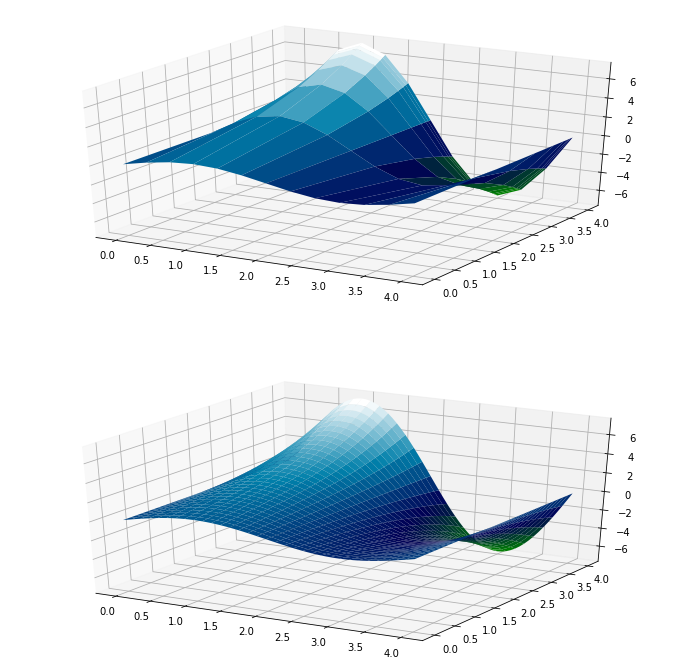

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.figure(7,figsize = (12,12))
x = plt.subplot(211,projection ='3d')
y = plt.subplot(212,projection ='3d')

x.plot_surface(X,Y,Z,cmap = cm.ocean)
y.plot_surface(X2,Y2,Z2,cmap = cm.ocean)